# **Introducción**


Los análisis de normalidad, también llamados contrastes de normalidad, tienen como objetivo analizar si los datos disponibles podrían proceder de una población con una distribución normal. Existen tres estrategias principales abordar este análisis:


Representaciones gráficas

Métodos analíticos

Test de hipótesis.

Uno de los ejemplos más empleados cuando se habla de variables aleatorias que siguen una distribución normal es la altura de las personas. Esta afirmación no es arbitraria, los procesos cuyo resultado es la suma de muchas pequeñas interacciones suelen converger en una distribución normal. La altura de una persona, es el resultado de miles de factores que se suman unos a otros condicionando el crecimiento.

A lo largo del siguiente documento se muestra como utilizar diferentes estrategias para determinar si la altura de un conjunto de personas sigue una distribución normal.

La distribución normal, distribución de Gauss o distribución gaussiana, es la distribución de probabilidad individual más importante. La distribución normal nos permite crear modelos de muchísimas variables y fenómenos, como por ejemplo, la estatura de los habitantes de un país, la temperatura ambiental de una ciudad, los errores de medición y muchos otros fenómenos naturales, sociales y hasta psicológicos. Por ello, hoy vamos a revisar sus características y muchísimos problemas resueltos en 3 niveles de dificultad.

# Importación de librerias 

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# cargar archivo de datos de un URL

In [3]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


In [4]:
datos.describe()

,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


De todos los datos disponibles se seleccionan únicamente mujeres mayores de 15 años.

In [5]:
datos = datos[(datos.age > 15) & (datos.male ==0)]
peso = datos['weight']
datos
datos.describe()

,height,weight,age,male
count,198.000000,198.000000,198.000000,198.0
mean,149.221682,41.386158,39.364646,0.0
std,5.358835,5.752358,16.716473,0.0
min,125.730000,22.679600,16.000000,0.0
25%,145.415000,37.506388,25.250000,0.0
50%,149.225000,41.276872,37.000000,0.0
75%,153.035000,44.948132,50.000000,0.0
max,162.560000,56.755699,85.600000,0.0


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 1 to 541
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  198 non-null    float64
 1   weight  198 non-null    float64
 2   age     198 non-null    float64
 3   male    198 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 7.7 KB


# Métodos gráficos

Uno de los métodos gráficos más empleados para el análisis de normalidad consiste en representar los datos mediante un histograma y superponer la curva de una distribución normal con la misma media y desviación estándar que los datos disponibles.

In [7]:
# Peso el  el dataset filtrado
type(peso)

pandas.core.series.Series

<class 'numpy.float64'>
<class 'numpy.float64'>
41.38615752272728 5.737813252284781


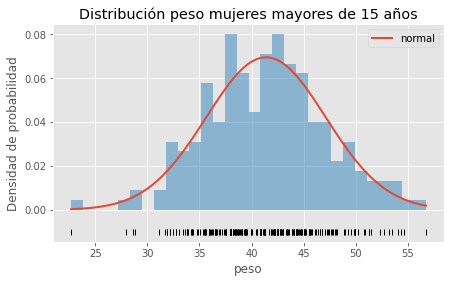

In [8]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
#  norm se utiliza para analizar la distribución normal y calcular sus diferentes valores de función de distribución utilizando los diferentes métodos disponibles
# mu media poblacional U
# sigma desviacion tipica indica si hay resultados muy alejados de la media, si la curva es mas achatada la desviacion tipica es alta si la curva es mas alta es mas conpacta indica que la desviacion tipica es muy baja, 
# idnica que los datos nos se desvian de la media
mu, sigma = stats.norm.fit(peso)

print(type (mu))
print (type( sigma))
print ( mu, sigma)
# mu media POBLACIONAL = MEDIANA 
# sigma desviacion tipica, cuanto % de cuanto se  aleja los esteremso de la media 
# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso), max(peso), num=100)

# norm.pdf()	Devuelve una matriz de n dimensiones. Es la función de densidad de probabilidad calculada en x.
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=peso, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(peso, np.full_like(peso, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

El histograma que se crea sige la forma de la campana de Gauss, lo que nos da una idea que loa valores tiene una distribución normal.
La mayor cantida de los datos se consentra en el centro, 


1.   representa la media. es central
2.   simetrica si divide a la campana en 2 partes iguales
3.   Asintotica cuando a media que va disminuyendo la curba de la campana  
     esta nunca va tocar el eje de las axisas   
4.   La media concentra la mayo parte de los datos 

La importancia de las pruebas de distribución:
Los resultados de la prueba  indican si se debe rechazar o no se debe rechazar  la hipotesis nula de que los datos porvienen de una poblacion  destribuida normalmente 









Otra representación utilizada con frecuencia son los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

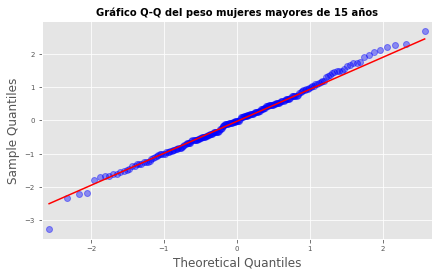

In [9]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    peso,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

El análisis gráfico parece indicar que los datos siguen una distribución normal.

un gráfico Q-Q ("Q" viene de cuantil) es un método gráfico para el diagnóstico de diferencias entre la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución usada para la comparación. Una forma básica de gráfico surge cuando la distribución para la comparación es una distribución teórica.1​ No obstante, puede usarse la misma idea para comparar las distribuciones inferidas directamente de dos conjuntos de observaciones, donde los tamaños de las muestras sean distintos

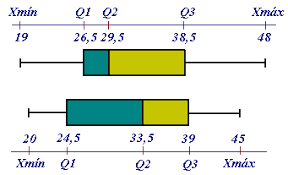

# Métodos analíticos asimetría y curtosis



Los estadísticos de asimetría (Skewness) y curtosis pueden emplearse para detectar desviaciones de la normalidad. Un valor de curtosis y/o coeficiente de asimetría entre -1 y 1, es generalmente considerada una ligera desviación de la normalidad (Bulmer, 1979), (Brown, n.d.). Entre -2 y 2 hay una evidente desviación de la normal pero no extrema.


In [10]:
print('Kursotis:', stats.kurtosis(peso))
print('Skewness:', stats.skew(peso))

Kursotis: 0.05524614843093856
Skewness: 0.032122514283202334


# Contraste de hipótesis

Los test Shapiro-Wilk test y D'Agostino's K-squared test son dos de los test de hipótesis más empleados para analizar la normalidad. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

El p-value de estos test indica la probabilidad de obtener unos datos como los observados si realmente procediesen de una población con una distribución normal con la misma media y desviación que estos. Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la normalidad.

El test de Shapiro-Wilk se desaconseja cuando se dispone de muchos datos (más de 50) por su elevada sensibilidad a pequeñas desviaciones de la normal.

In [11]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(peso)
shapiro_test

ShapiroResult(statistic=0.9963726997375488, pvalue=0.9239704012870789)

In [12]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(peso)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 0.19896549779904893, p-value = 0.9053055672511008


Ninguno de los test muestra evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value muy próximo a 1).

Una p < 0,05 significa que la hipótesis nula es falsa y una p > 0,05 que la hipótesis nula es verdadera: siempre nos movemos en el terreno de la probabilidad.

¿Qué significa un valor p superior a 0.5?
Las probabilidades matemáticas, como los valores de p, van desde 0 (ninguna posibilidad) a 1 (certeza absoluta). Así que 0.5 significa 50 % de probabilidad y 0.05 significa 5 % de probabilidad. Si el valor p es menor. 01, los resultados se consideran estadísticamente significativos y si son inferiores. En 005 se consideran estadísticamente muy significativos.

Cuando estos test se emplean con la finalidad de verificar las condiciones de métodos paramétricos, por ejemplo un t-test o un ANOVA, es importante tener en cuenta que, al tratarse de p-values, cuanto mayor sea el tamaño de la muestra más poder estadístico tienen y más fácil es encontrar evidencias en contra de la hipótesis nula de normalidad. Al mismo tiempo, cuanto mayor sea el tamaño de la muestra, menos sensibles son los métodos paramétricos a la falta de normalidad. Por esta razón, es importante no basar las conclusiones únicamente en el p-value del test, sino también considerar la representación gráfica y el tamaño de la muestra.

# Consecuencias de la falta de normalidad

El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

# Información de sesión

In [14]:
from sinfo import sinfo
sinfo()

ModuleNotFoundError: ignored